In [1]:
## importing the necessary packages

import pandas as pd
import numpy as np
import seaborn as sn
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_recall_curve,auc,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
## loading the dataset 
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
## checking the dataset for missing values and datatypes, this dataset doesnt have any missing values and all its datatypes are 
## int,float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
## sicne the col ID doesnt have any impact in the classification we are dropping it
data.drop(labels = 'ID',axis = 1,inplace = True)

In [5]:
## detailed description about the data, understanding the characteristics of the data in a theoritical way
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


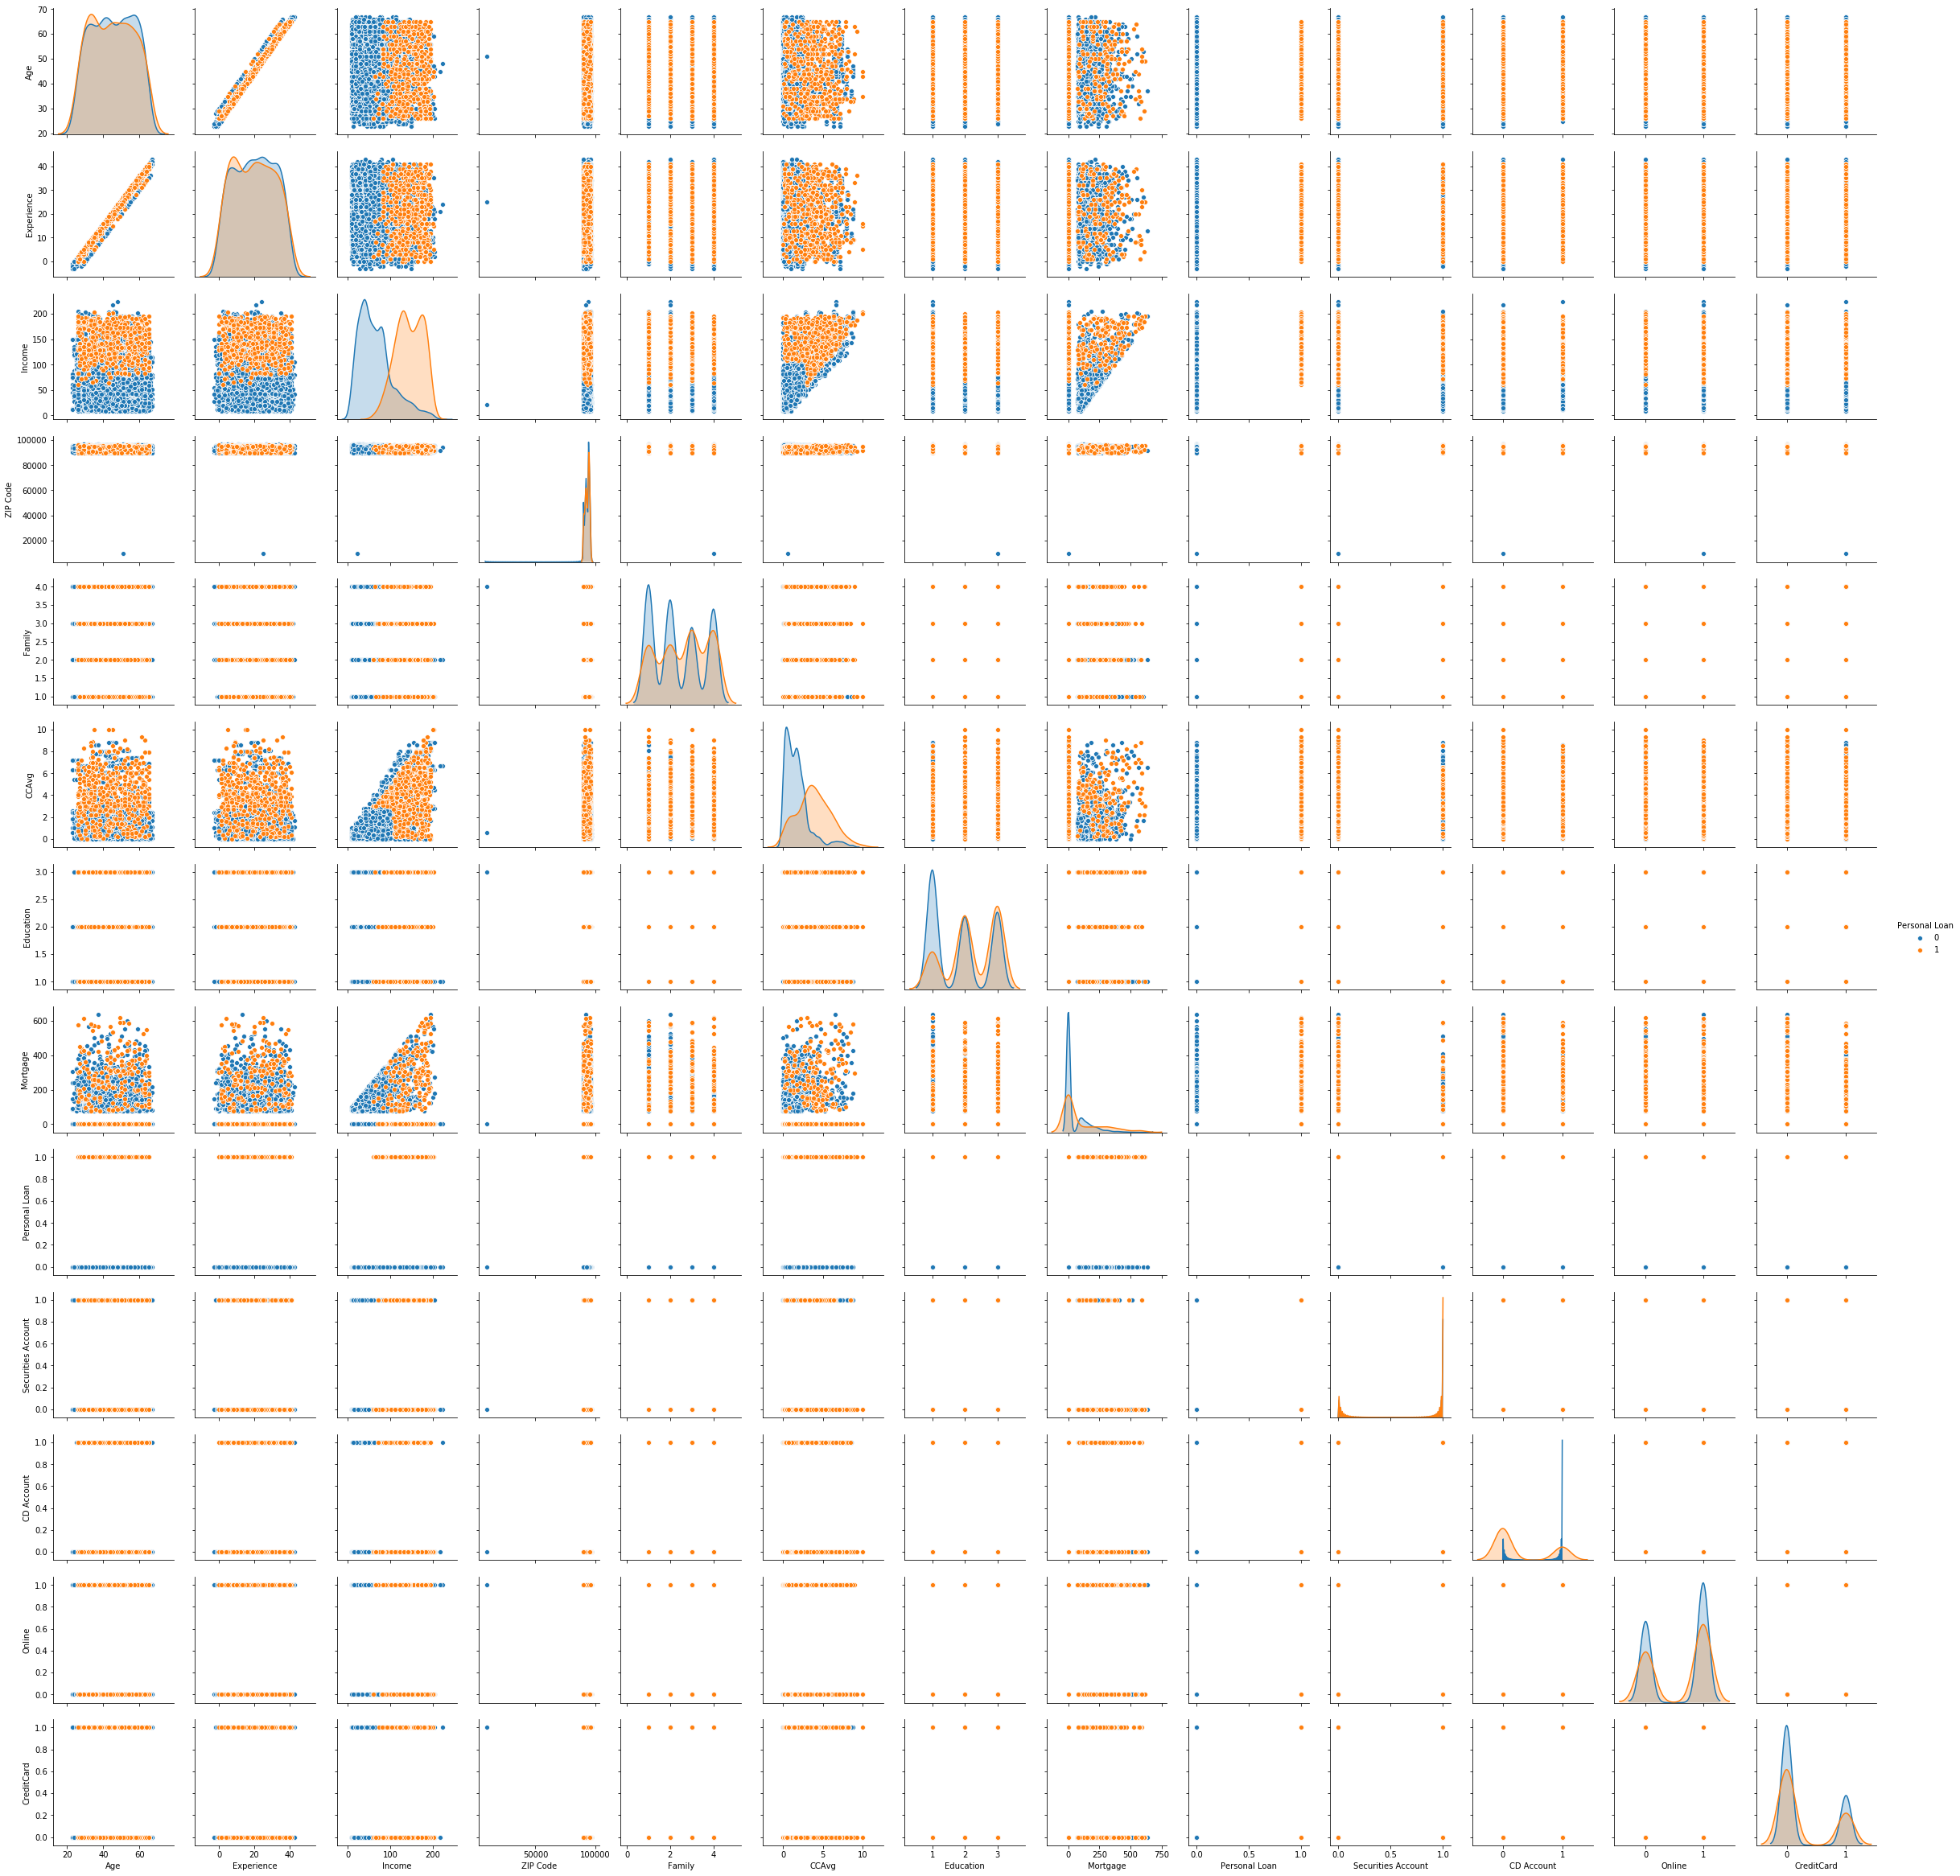

In [6]:
## visual understanding about the characteristics of the data, we can understand the impact of each and every features and 
## their distributions
sn.pairplot(data,diag_kind = 'kde',hue = 'Personal Loan')

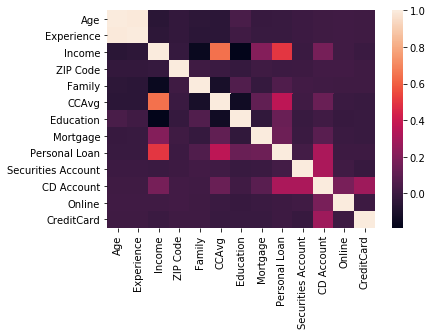

In [7]:
## understanding the relation of each and every features using correlation
sn.heatmap(data.corr())

$ The features 'Income' is good for this classification since it is dependent on the target column and also we can clearly visualise this in the pairplot(the split based on personal loans).It aslo has outliers which has to be treated.

$ The features 'age' and 'experience' are strongly dependent with corr_score almost 1, its better to drop any one since both of them are presenting same information (only the scales differ).

$ The feature 'CCAvg' is good for this classification since it is dependent on the target column and also we can clearly vsiualise the split for personal loans in the distribution.It aslo has outliers which has to be treated.

$ Most of the features are nearly independent among each other, this can result in a good prediction.

$ The feature 'Mortgage' is heavily right skewed(lot of outliers), this results in some noise which is added to the model error. For treating the outliers we cant use 'log' since the feature has 0s which can reult in infinite values.

In [8]:
## checking the varince for features, all the numerical features are having variance good for classification(above 1)
data.var()

Age                   1.314042e+02
Experience            1.315140e+02
Income                2.119104e+03
ZIP Code              4.502257e+06
Family                1.317130e+00
CCAvg                 3.054312e+00
Education             7.053801e-01
Mortgage              1.034570e+04
Personal Loan         8.680136e-02
Securities Account    9.351934e-02
CD Account            5.676319e-02
Online                2.406779e-01
CreditCard            2.076055e-01
dtype: float64

## Altering the features to increase the model performance

In [9]:
##dropping the feature age 
data.drop(labels = 'Age',axis = 1,inplace = True)

## Analysing target column

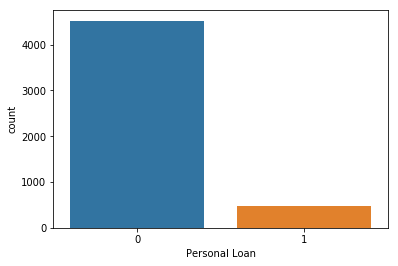

In [10]:
sn.countplot(x = 'Personal Loan',data = data)

The dependent variable is heavily imbalanced with higher negatives(not accepting the personal loan),so we cant use accuracy to evaluate this model since it will give high accuracy even though it predicts all the labels as negatives.

## Building the models and prediction

We are not treating the outliers for logistic regression since the sigmoid function gives output between 0-1 with input 
-infinity to +infinity

## Logistic Regression

In [11]:
X = data.drop(labels = 'Personal Loan',axis = 1)

In [12]:
Y = data['Personal Loan']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [14]:

## building the model and fitting the data
model = LogisticRegression()
model.fit(x_train,y_train) 

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
## predicting for train and test data
predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)

In [16]:
## accuracy score
model.score(x_test,y_test)

0.9233333333333333

In [17]:
## we can see the model accuracy is 91.5% but when we look at the confusion matrix there are less TPs, high FNs and TNs
##almost all the labels have been classified as negatives. (acc = 1342+0 / 1342+158  => 1342/1500=0.89446)
## so accuracy is not the right metric for this classification
metrics.confusion_matrix(predicted_test,y_test)

array([[1341,   80],
       [  35,   44]], dtype=int64)

In [18]:
## the right metrics for this classification is precison(TP/TP+FP) and recall(TP/TP+FN)

In [19]:
##predicting the probability
predicted_prob = model.predict_proba(x_train)

## using precision-recall curve since the data is imbalanced
pres,rec,thres = precision_recall_curve(y_train,predicted_prob[:,1])

optimal_pres = 0
optimal_thres = 0
## to find the optimal threshold using f1-score
for val in thres:
    result = np.where(predicted_prob[:,1]>val,1,0)
    f1 = f1_score(y_train,result)
    if(optimal_pres < f1):
        optimal_pres = f1
        optimal_thres = val
print('For the train data \nthe optimal f1-score is %1.3f and optimal threshold is %1.3f' %(optimal_pres,optimal_thres)) 
metrics.confusion_matrix(np.where(predicted_prob[:,1]>optimal_thres,1,0),y_train)

For the train data 
the optimal f1-score is 0.549 and optimal threshold is 0.189


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[2831,  103],
       [ 313,  253]], dtype=int64)

In [21]:
## evaluating using test data
res = np.where(model.predict_proba(x_test)[:,1]>optimal_thres,1,0)

pres_test_log = metrics.precision_score(y_test,res)   ##precision
rec_test_log = recall_score(y_test,res)               ##recall
f1score_test_log = f1_score(y_test,res)               ##f1-score

print('For the test data \nprecision is %1.3f , recall is %1.3f and f1_score is %1.3f' %(pres_test_log,rec_test_log,f1score_test_log))
cm_logreg = metrics.confusion_matrix(res,y_test)
print(cm_logreg)

For the test data 
precision is 0.412 , recall is 0.758 and f1_score is 0.534
[[1242   30]
 [ 134   94]]


The precision here says the ratio of people who accept the loan to total people taken into account for the loan campaign,
here after campagin out of 253 people 109 accepted the loan.

The recall tells about the percentage of people accepting the loan in a given data, here out of 146 people the model
correctly identifies 109 people, good recall.

In [22]:
auc(rec,pres)

0.4514480076288922

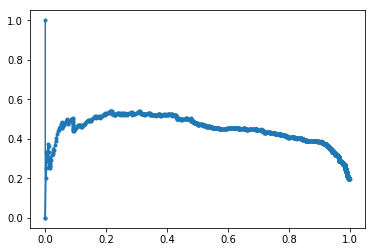

In [23]:
from matplotlib import pyplot

##plot the precision-recall curve for the model
pyplot.plot(rec, pres, marker = '.')
##show the plot
pyplot.show()

## Treating the outliers for knn and naive bayes

In naive bayes since it calculates probability using gaussian distribution we have to treat the outliers for better result.

KNN classifies using neighbors where the outliers has imapct hence treating the outliers. 

In [24]:
mod_data = data

## since for treating outliers in CCAvg and Mortgage we cant use log as 0s are present, Im just adding a small values to 
## both the col respectively such that it doesnt have an impact
mod_data['CCAvg'] = mod_data['CCAvg'].transform(func = lambda x: x+0.07)
mod_data['Mortgage'] = mod_data['Mortgage'].transform(func = lambda x: x+1)
## we can see there is not much change in the statistcs when I add the above values 
mod_data.describe()
## now applying log transformation
mod_data['Mortgage'] = mod_data['Mortgage'].transform(func = lambda x: np.log(x))
mod_data['CCAvg'] = mod_data['CCAvg'].transform(func = lambda x: np.log(x))
## since we dont have any 0s in income we straight away apply log transformation
mod_data['Income'] = mod_data['Income'].transform(func = lambda x: np.log(x))

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


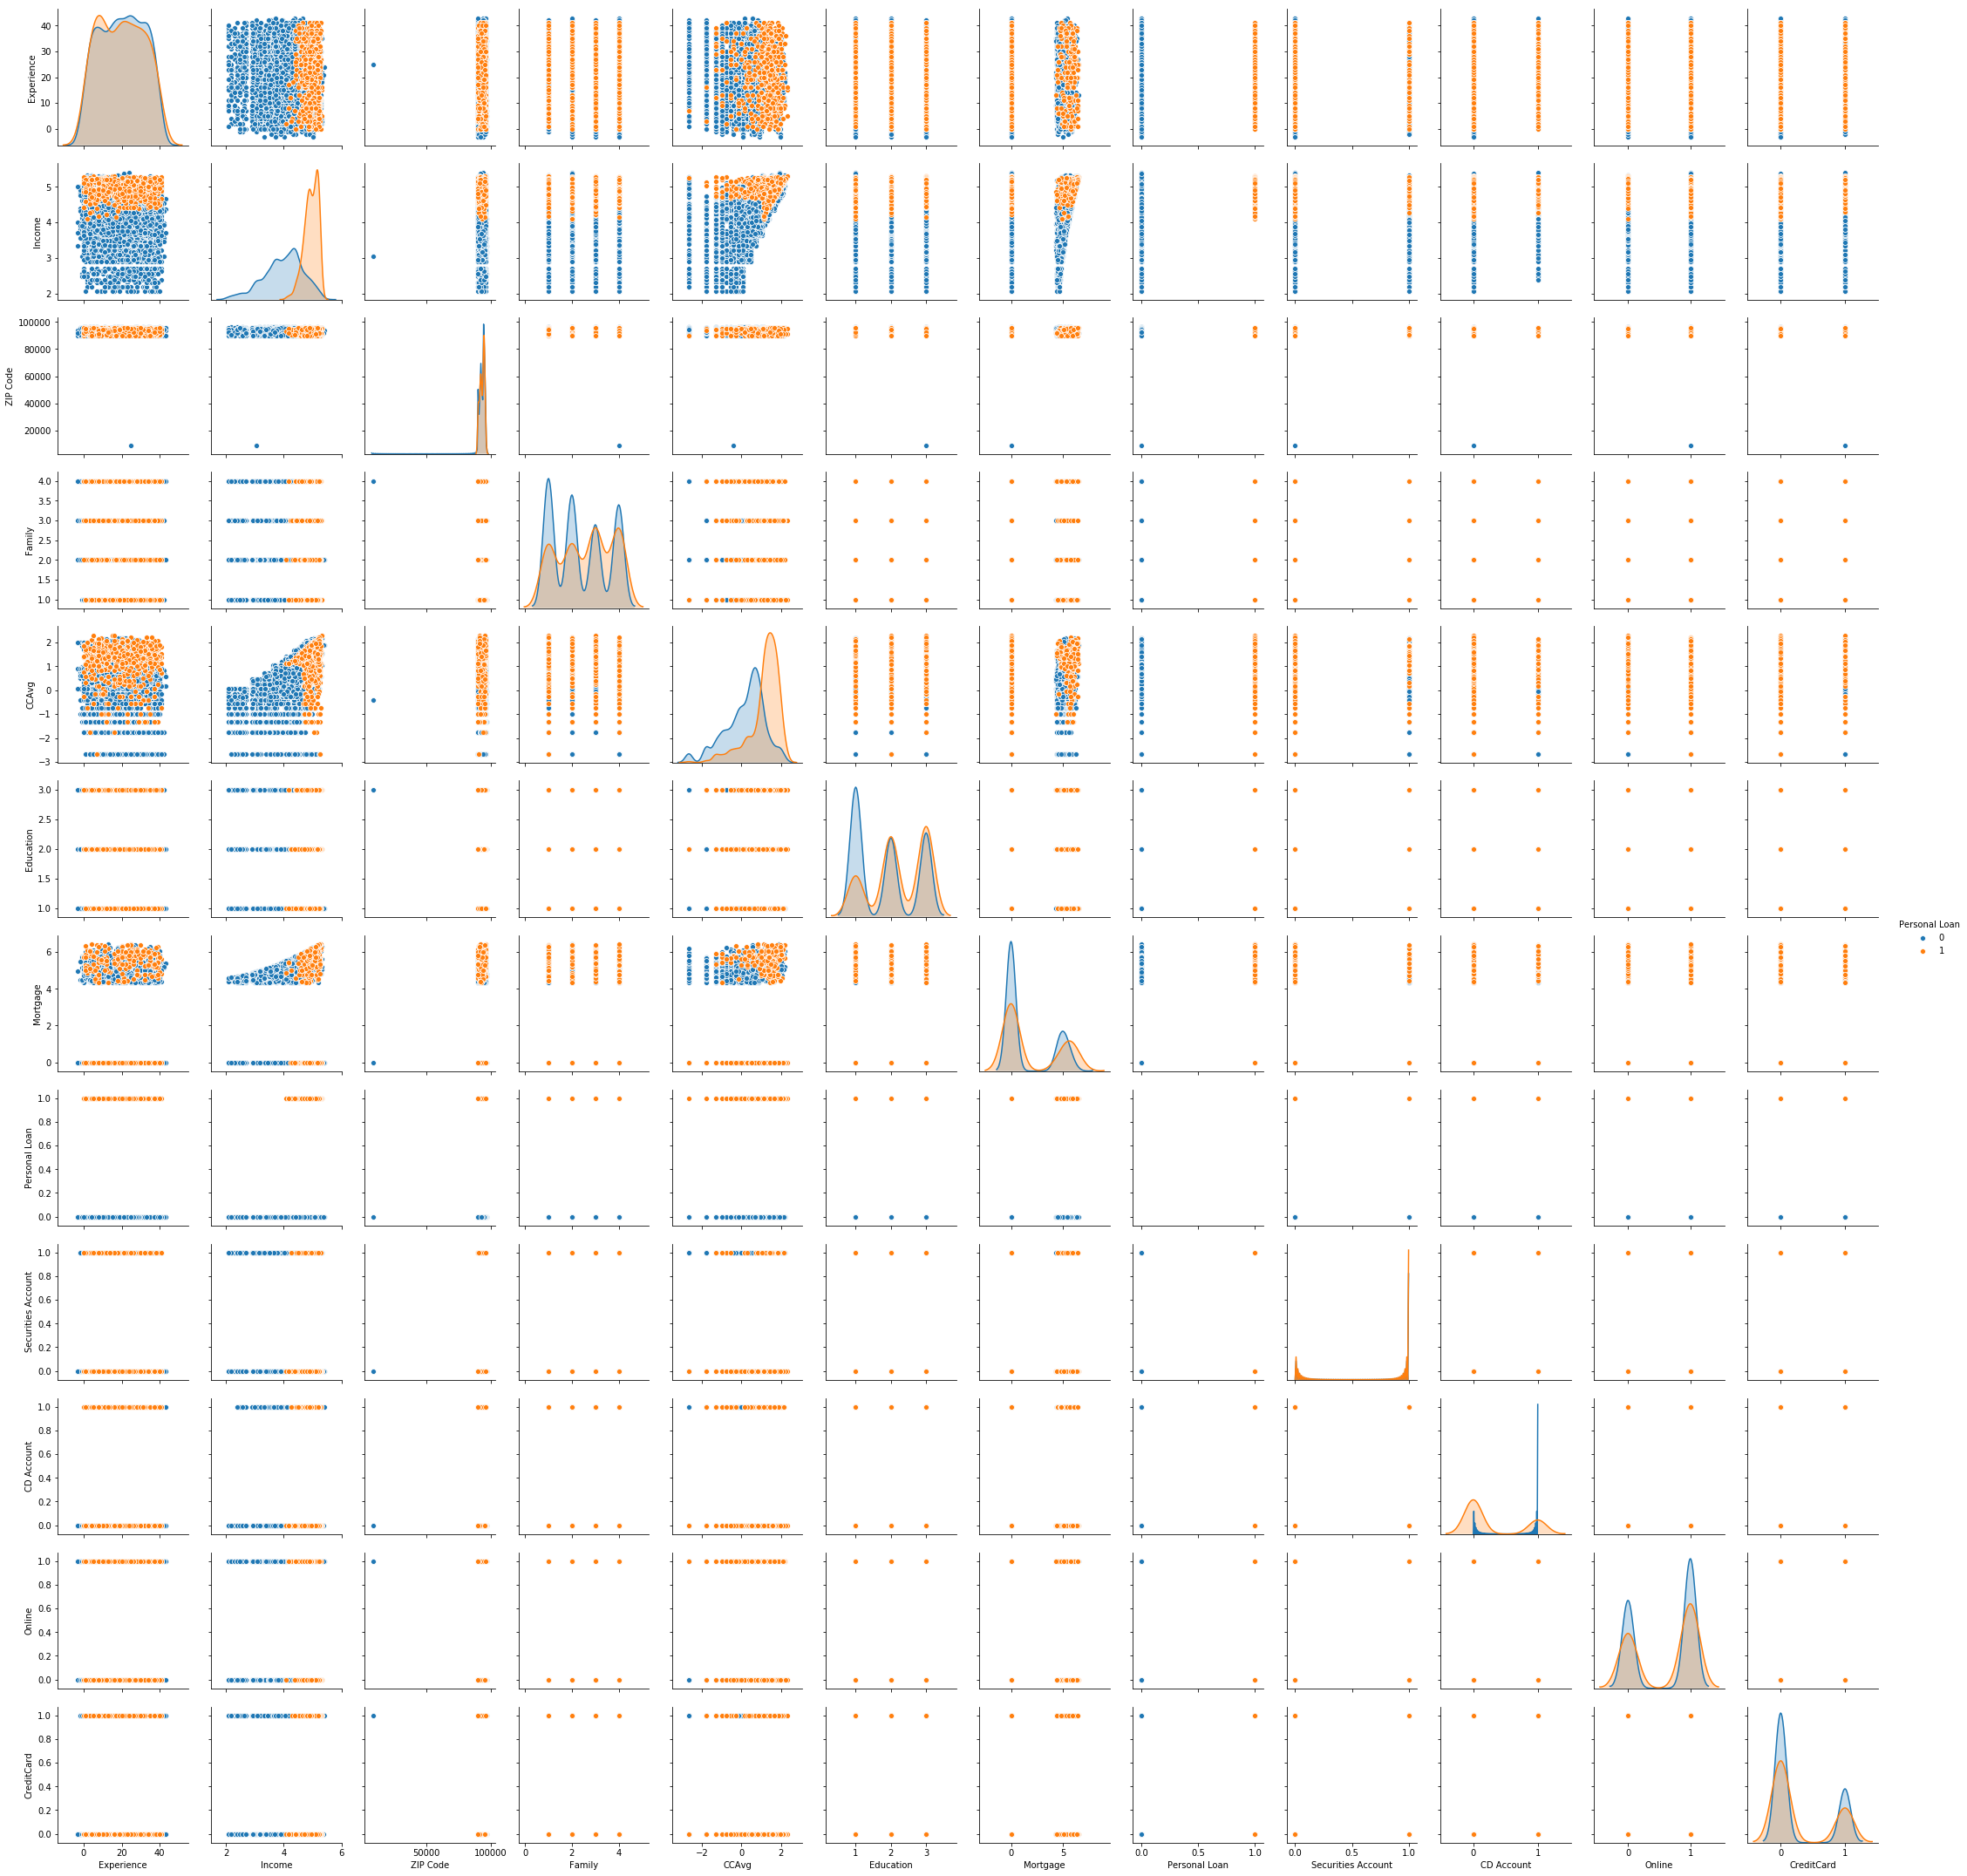

In [25]:
sn.pairplot(mod_data,diag_kind = 'kde',hue = 'Personal Loan')

In [26]:
mod_data.describe()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,20.104600,4.085451,93152.503000,2.396400,0.284026,1.881000,1.566982,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.467954,0.696455,2121.852197,1.147663,1.011844,0.839869,2.366428,0.294621,0.305809,0.23825,0.490589,0.455637
min,-3.000000,2.079442,9307.000000,1.000000,-2.659260,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10.000000,3.663562,91911.000000,1.000000,-0.261365,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,20.000000,4.158883,93437.000000,2.000000,0.451076,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,30.000000,4.584967,94608.000000,3.000000,0.943906,3.000000,4.624973,0.000000,0.000000,0.00000,1.000000,1.000000
max,43.000000,5.411646,96651.000000,4.000000,2.309561,3.000000,6.455199,1.000000,1.000000,1.00000,1.000000,1.000000


Eventhough after applying log transformation we are not completely outliers free(there are very few) but comparatively its far better than the data before transformation.

## Naive Bayes

In [27]:
X = mod_data.drop(labels = 'Personal Loan',axis = 1)
Y = mod_data['Personal Loan']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [28]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
## predicting for train and test data
predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)

In [30]:
##predicting the probability
predicted_prob = model.predict_proba(x_train)

## using precision-recall curve since the data is imbalanced
pres,rec,thres = precision_recall_curve(y_train,predicted_prob[:,1])

optimal_pres = 0
optimal_thres = 0
## to find the optimal threshold using f1-score
for val in thres:
    result = np.where(predicted_prob[:,1]>val,1,0)
    f1 = f1_score(y_train,result)
    if(optimal_pres < f1):
        optimal_pres = f1
        optimal_thres = val
print('For the train data \nthe optimal f1-score is %1.3f and optimal threshold is %1.3f' %(optimal_pres,optimal_thres)) 
metrics.confusion_matrix(np.where(predicted_prob[:,1]>optimal_thres,1,0),y_train)

For the train data 
the optimal f1-score is 0.647 and optimal threshold is 0.236


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[2973,   80],
       [ 195,  252]], dtype=int64)

In [31]:
## evaluating using test data
res = np.where(model.predict_proba(x_test)[:,1]>optimal_thres,1,0)

pres_test_NB = metrics.precision_score(y_test,res)   ##precision
rec_test_NB = recall_score(y_test,res)               ##recall
f1score_test_NB = f1_score(y_test,res)               ##f1-score

print('For the test data \nprecision is %1.3f , recall is %1.3f and f1_score is %1.3f' %(pres_test_NB,rec_test_NB,f1score_test_NB))
cm_NB = metrics.confusion_matrix(res,y_test)
print(cm_NB)

For the test data 
precision is 0.601 , recall is 0.764 and f1_score is 0.673
[[1277   35]
 [  75  113]]


In [32]:
auc(rec,pres)

0.6544780355574719

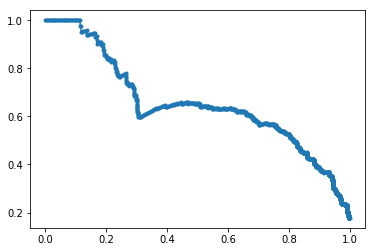

In [33]:
##plot the precision-recall curve for the model
pyplot.plot(rec, pres, marker = '.')
##show the plot
pyplot.show()

## KNN

In [34]:
from math import sqrt
from scipy.stats import zscore
val = 3
optimal_pres = 0
optimal_thres = 0

X = X.apply(zscore)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

## checking for optimal k
while val < sqrt(x_train.shape[0]):
    model = KNeighborsClassifier(n_neighbors = val)
    model.fit(x_train,y_train)
    predicted_train = model.predict(x_train)
    f1 = f1_score(y_train,predicted_train)
    if(optimal_pres < f1):
        optimal_pres = f1
        optimal_thres = val
    val += 2    
print('For the train data \nthe optimal f1-score is %1.3f and optimal threshold is %1.3f' %(optimal_pres,optimal_thres)) 
metrics.confusion_matrix(predicted_train,y_train)

For the train data 
the optimal f1-score is 0.843 and optimal threshold is 3.000


array([[3124,  265],
       [  21,   90]], dtype=int64)

In [35]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train,y_train)

predicted_test = model.predict(x_test)
## eventhough we predict probability we will get either 1 or 0
predicted_prob = model.predict_proba(x_test)
## using precision-recall curve since the data is imbalanced
pres,rec,thres = precision_recall_curve(y_test,predicted_prob[:,1])

pres_test_knn = metrics.precision_score(y_test,predicted_test)   ##precision
rec_test_knn = recall_score(y_test,predicted_test)               ##recall
f1score_test_knn = f1_score(y_test,predicted_test)               ##f1-score

print('For the test data \nprecision is %1.3f , recall is %1.3f and f1_score is %1.3f' %(pres_test_knn,rec_test_knn,f1score_test_knn))
cm_knn = metrics.confusion_matrix(predicted_test,y_test)
print(cm_knn)

For the test data 
precision is 0.844 , recall is 0.608 and f1_score is 0.707
[[1361   49]
 [  14   76]]


In [36]:
auc(rec,pres)

0.8074632124352331

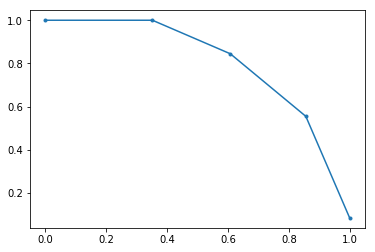

In [37]:
##plot the precision-recall curve for the model
pyplot.plot(rec, pres, marker = '.')
##show the plot
pyplot.show()

In [38]:
print('The confusion matrix for LogReg \n',cm_logreg)
print('The confusion matrix for NB \n',cm_NB)
print('The confusion matrix for KNN \n',cm_knn)

The confusion matrix for LogReg 
 [[1242   30]
 [ 134   94]]
The confusion matrix for NB 
 [[1277   35]
 [  75  113]]
The confusion matrix for KNN 
 [[1361   49]
 [  14   76]]


In [39]:
print('For LogReg \nprecision is %1.3f , recall is %1.3f and f1_score is %1.3f' %(pres_test_log,rec_test_log,f1score_test_log))
print('For Naive bayes \nprecision is %1.3f , recall is %1.3f and f1_score is %1.3f' %(pres_test_NB,rec_test_NB,f1score_test_NB))
print('For KNN \nprecision is %1.3f , recall is %1.3f and f1_score is %1.3f' %(pres_test_knn,rec_test_knn,f1score_test_knn))

For LogReg 
precision is 0.412 , recall is 0.758 and f1_score is 0.534
For Naive bayes 
precision is 0.601 , recall is 0.764 and f1_score is 0.673
For KNN 
precision is 0.844 , recall is 0.608 and f1_score is 0.707


$ In LogReg model it predcits 228 people likely to buy personal loan out of which actually 94 are likely to buy, so the bank conducts campaign on extra 144 people. Also the model makes 30 FNs, i.e the bank is losing 30 customers who are likely to buy loan.

$ In naive bayes model it predcits 188 people likely to buy personal loan out of which actually 113 are likely to buy, so the bank conducts campaign on extra 75 people. Also the model makes 35 FNs, i.e the bank is losing 35 customers who are likely to buy loan.

$ In KNN model it predcits 90 people likely to buy personal loan out of which actually 76 are likely to buy, so the bank conducts campaign on extra 14 people. Also the model makes 49 FNs, i.e the bank is losing 49 customers who are likely to buy loan.


Logistic Resgression doesnt perform well due to the non-linear seperable of the data, in python(sklearn package) the default LogReg is pretty regularised such that we get linear decision boundaries, hence it doesnt fit the given data.

Conclusion:
     If the bank is very much concerned about their likely customer(not willing to lose them) and can spend little extra money for the campaign then Naive Bayes is the best model.
     If the bank doesnt want to spend any extra for the campaign and are fine in losing some likely customers then KNN is best.